# Análise descritiva para resposta contínua - parte 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

## 1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [3]:
# Bibliotecas 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# DataFrame

df = pd.read_csv('previsao_de_renda.csv')
print(df.shape)
df.head()

(15000, 16)


,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [5]:
# Variáveis numéricas

df_num = df.select_dtypes('number')
df_num.head()

,Unnamed: 0,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,8682,1,36,3.575342,3.0,3369.24
1,1,12830,0,42,0.860274,2.0,6096.14
2,2,2885,2,31,8.065753,4.0,5658.98
3,3,16168,0,50,1.208219,2.0,7246.69
4,4,12438,0,52,13.873973,2.0,4017.37


In [6]:
# Removendo informação irrelevantes

df_num.drop(columns=['Unnamed: 0', 'index'], inplace=True)

In [7]:
# O dataframe
df_num.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37


In [8]:
# Definindo a matriz de correlação

correlation_matrix = df_num.corr()
correlation_matrix

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


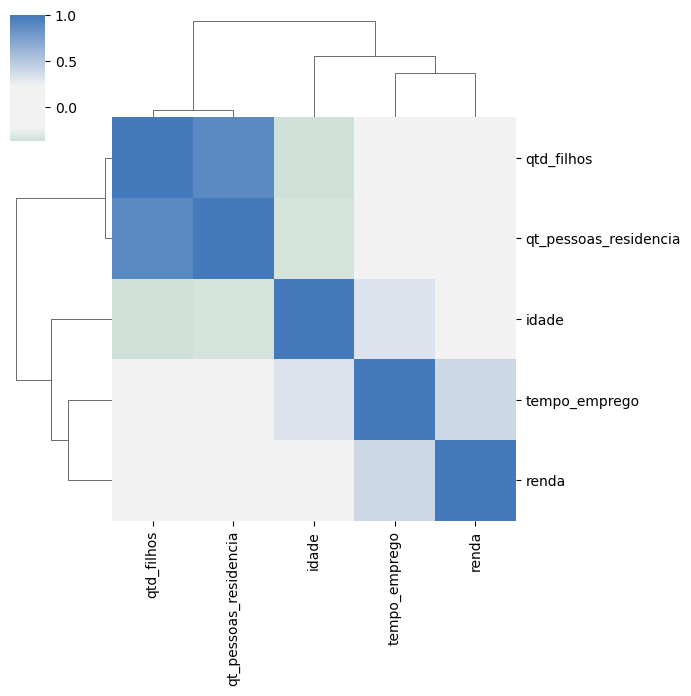

In [134]:
# Gerando uma visualização gráfica da matriz de correlação

# Definindo o mapa de cores
cmap = sns.diverging_palette(h_neg=150, h_pos=250, as_cmap=True, sep=60, center='light')
# Gerando a figura
sns.clustermap(correlation_matrix, figsize=[7,7], center=0, cmap=cmap)

# Insights

Nota-se que os maiores valores de correlação se dão entre as variáveis `qtd_filhos` e `qt_pessoas_residencia`. Tal correlação é justificável uma vez que quanto maior (menor) for o número de filhos, maior (menor) será o número de pessoas na residência. Isso pode ser evidenciado pela visualização gráfica da matriz de correlação, em que os valores mais significativos são destacados por tais variáveis. 

## 2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

> De acordo com a *matriz de correlação* as variáveis que mais se correlacionam com a `renda` são `tempo_emprego` e `idade`, mesmo a correlação sendo significativamente baixa para o último.

In [140]:
correlation_matrix

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


Text(0.5, 1.0, 'Tempo de emprego x Renda')

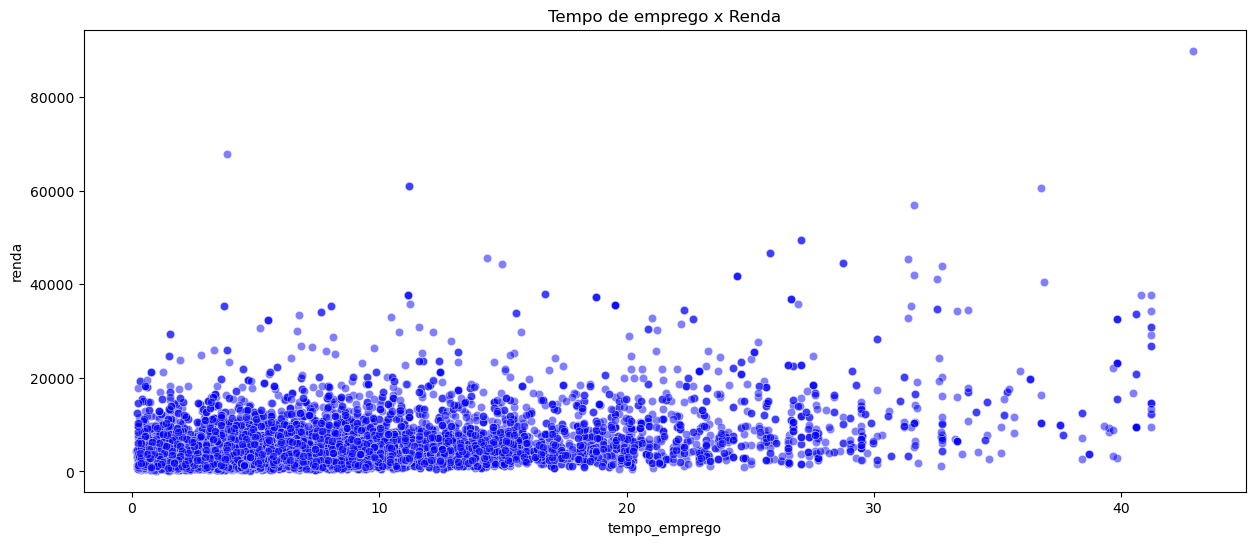

In [155]:
# Gráfico de dispersão do tempo_emprego x renda 

fig = plt.figure(figsize=[15,6])
sns.scatterplot(
    df_num, 
    x='tempo_emprego', 
    y='renda', 
    color='blue', 
    alpha=.5
)

plt.title('Tempo de emprego x Renda')

Text(0.5, 1.0, 'Idade x Renda')

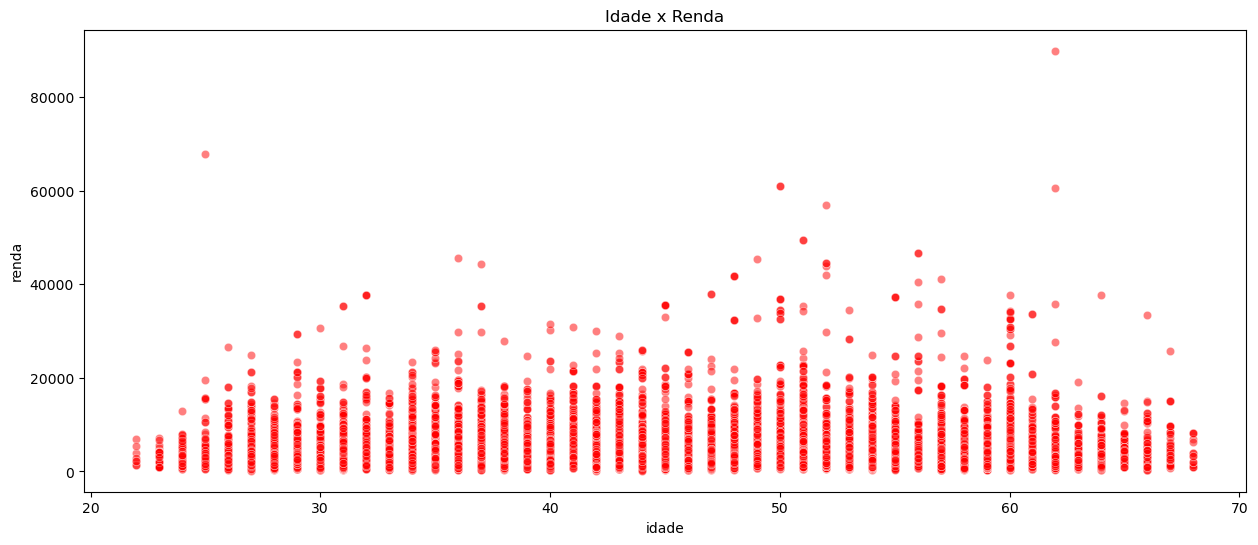

In [128]:
# Gráfico de dispersão idade x renda

fig = plt.figure(figsize=[15,6])
sns.scatterplot(
    df_num, 
    x='idade', 
    y='renda',
    color='red',
    alpha=.5
)

plt.title('Idade x Renda')

# Insights

Como pode-se notar, a correlação entre `tempo_emprego` e a variável `renda` não é muito alta, porém é possível perceber que com o aumento nos valores associados a primeira variável a segunda parece responder com um aumento. 

Abaixo está o mesmo gráfico de dispersão, mas com o eixo y limitado (um "zoom"). É perceptível que para valores mais altos da variável `tempo_emprego` há também valores mais elevados na variável `renda`, parece haver uma tendência.

Text(0.5, 1.0, 'Tempo de emprego x Renda')

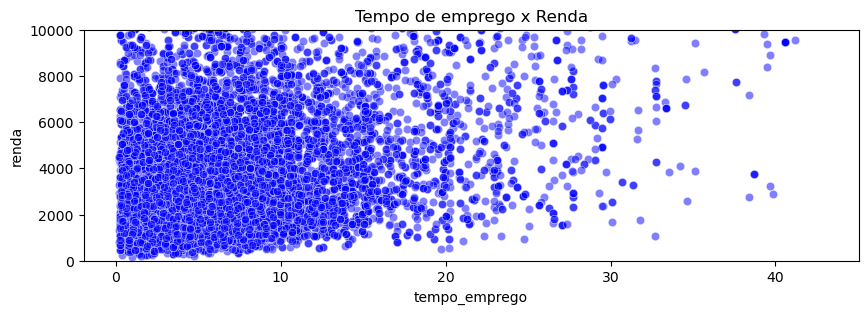

In [170]:
fig = plt.figure(figsize=[10,3])
figure = sns.scatterplot(
        df_num, 
        x='tempo_emprego', 
        y='renda', 
        color='blue', 
        alpha=.5
)

figure.set(ylim=(0, 10000))
plt.title('Tempo de emprego x Renda')

Verificando a "tendência" por meio de um gráfico de regressão.

[(0.0, 15000.0)]

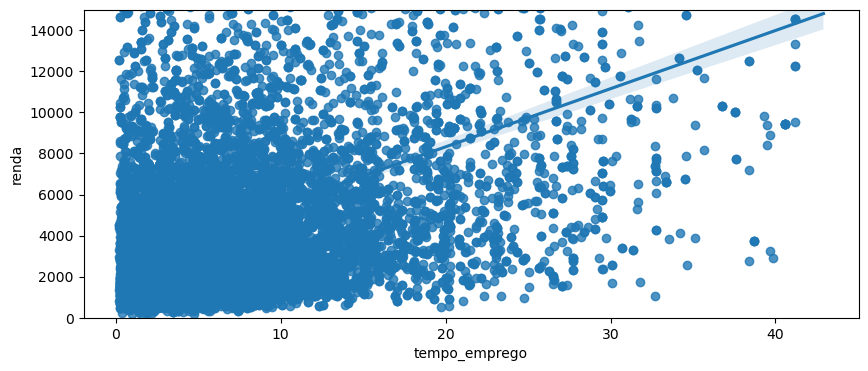

In [176]:
figure = plt.figure(figsize=[10, 4])

fig = sns.regplot(data=df_num, x='tempo_emprego', y='renda')
fig.set(ylim=[0, 15000])

A variável `idade` possui uma correlação muito baixa com a `renda`. É notório que há uma dependência da renda com certas faixas de idade, mas não parece ser possível extrair uma análise sólida entre essas duas variáveis.

## 3) Na sua opinião, há outliers na variável renda?

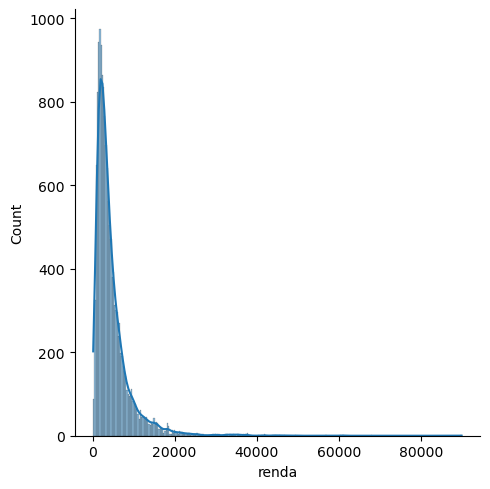

In [190]:
# Gerando um gráfico de distribuição da renda

sns.displot(
    df_num, 
    x='renda',
    # bins=50,
    kde=True
)

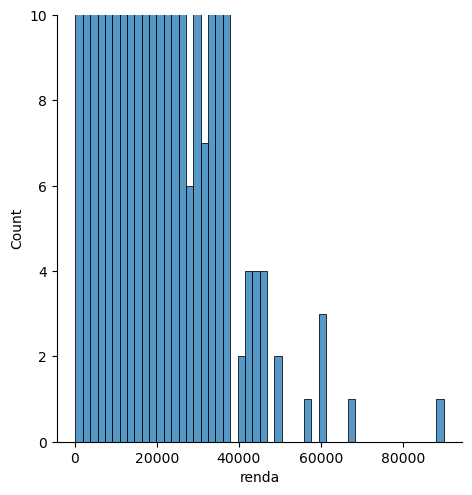

In [192]:
# Aplicando um zoom à figura (limitando o eixo y)

fig = sns.displot(
    df_num, 
    x='renda',
    bins=50,
    # kde=True
)

fig.set(ylim=(0, 10))

In [199]:
# Verificando valores de renda acima de 50000

df_num[df_num['renda'] > 50000]

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
113,1,25,3.849315,3.0,67794.54
6772,0,52,31.621918,2.0,56938.90
7078,0,50,11.189041,2.0,60965.51
7765,0,62,36.753425,1.0,60475.59
9028,0,50,11.189041,2.0,60965.51
9934,0,62,42.906849,2.0,89918.04


# Insights

Após gerar alguns gráficos, é possível perceber que há alguns pontos que podem ser considerados como outliers, não necessariamente por terem sido digitados errado, mas sim por serem altos. A realidade financeira é muito discrepante e valores acima de 50000 não refletem a realidade da população em geral. Esses valores, em determinados modelos e análises podem gerar enviesamentos e erros devido a discrepância em relação aos demais.

## 4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [202]:
# Calculando o logaritmo

df_log = df_num.copy()
df_log['renda_log'] = np.log(df_log['renda'])

In [216]:
df_log[df_log['renda'] > 50000]

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,renda_log
113,1,25,3.849315,3.0,67794.54,11.124237
6772,0,52,31.621918,2.0,56938.90,10.949734
7078,0,50,11.189041,2.0,60965.51,11.018064
7765,0,62,36.753425,1.0,60475.59,11.009995
9028,0,50,11.189041,2.0,60965.51,11.018064
9934,0,62,42.906849,2.0,89918.04,11.406654


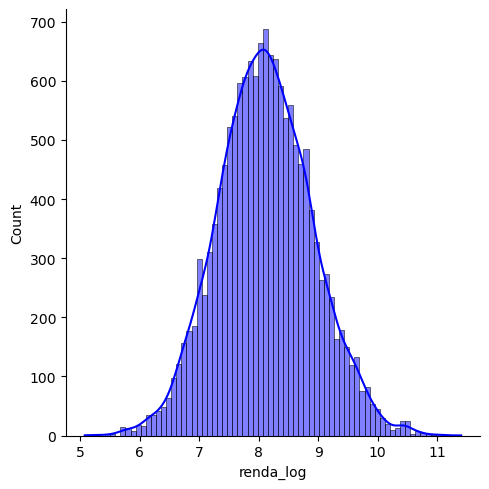

In [236]:
# Gerando um gráfico de distribuição 
sns.displot(
    df_log,
    x='renda_log',
    kde=True,
    color='blue',
)

Considerando o `log` da renda tem-se um comportamento que se aproxima de uma distribuição normal ou Gaussiana. Porém, não parece ser vantajoso para a análise em si. 

Text(0.5, 1.0, 'tempo_emprego x renda_log')

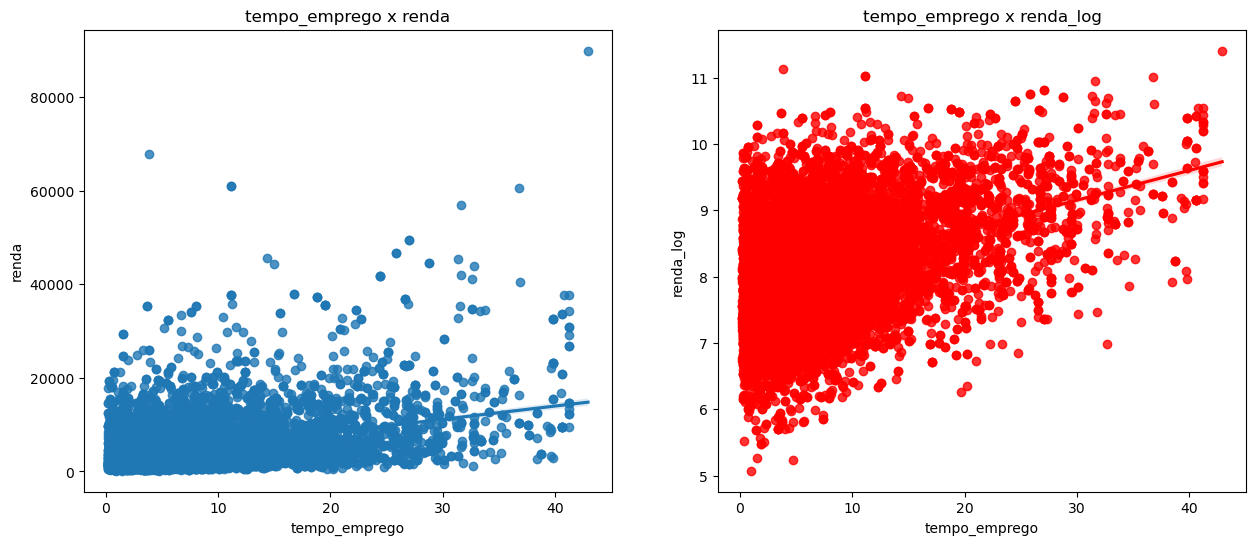

In [251]:
# Gráfico de regressão 

fig, axes = plt.subplots(1,2)
plt.rc('figure', figsize=(15,6))

ax1 = sns.regplot(ax=axes[0], data=df_log, x='tempo_emprego', y='renda')
ax1.set_title('tempo_emprego x renda')
ax2 = sns.regplot(ax=axes[1], data=df_log, x='tempo_emprego', y='renda_log', color='red')
ax2.set_title('tempo_emprego x renda_log')

Text(0.5, 1.0, 'idade x renda_log')

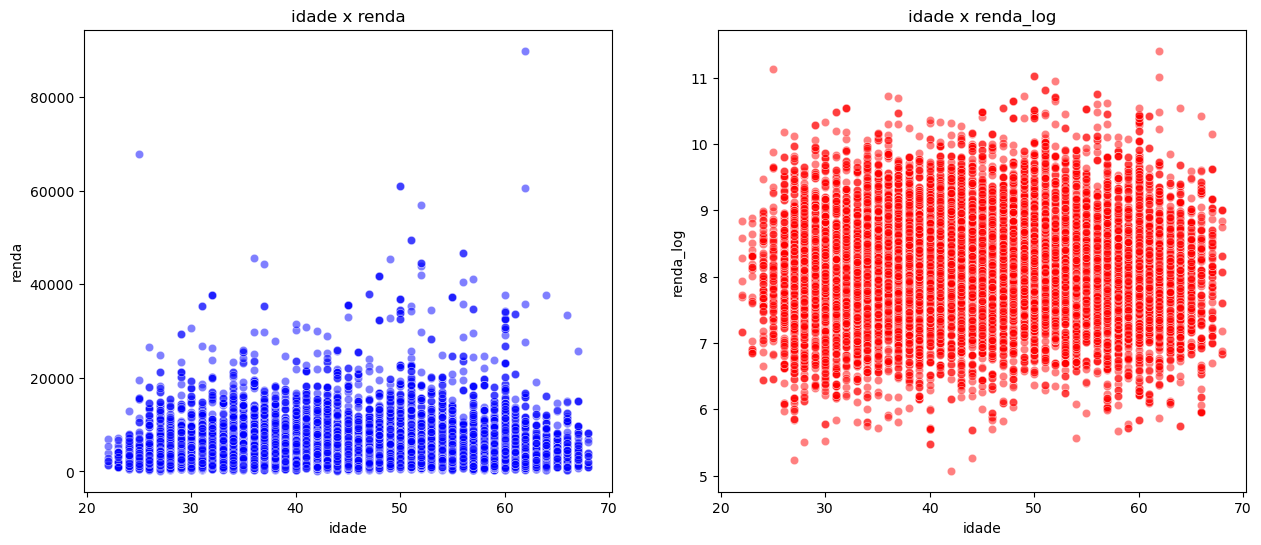

In [253]:
# Gráfico de dispersão da idade x renda

fig, axes = plt.subplots(1,2)
plt.rc('figure', figsize=(15,6))

ax1 = sns.scatterplot(ax = axes[0], x='idade', y='renda', data=df_log, alpha=.5, color='blue')
ax1.set_title('idade x renda')
ax2 = sns.scatterplot(ax = axes[1], x='idade', y='renda_log', data=df_log, alpha=.5, color='red')
ax2.set_title('idade x renda_log')

## 5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Uma vez que os valores de renda são fixos (montantes) e não são valores que se alteram ao longo do tempo, a aplicação do logaritmo não parece ser a melhor técnica. Seria mais eficiente para situações em que se tem o crescimento exponencial ao longo do tempo, como pode ser o caso de uma cultura de bactérias por exemplo, também pode ser utilizado quando se analisa a variação percentual de determinada quantidade, como a variação dos preços de ações ou títulos.